In [23]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [24]:
iris = load_iris()
X = iris.data
y = iris.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [27]:
kmeans.fit(X_train,y_train)

c:\Users\vikas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [28]:
y_pred = kmeans.predict(X_test)

In [29]:
kmeans.cluster_centers_

array([[6.82      , 3.09333333, 5.68666667, 2.03333333],
       [4.96451613, 3.37741935, 1.46451613, 0.2483871 ],
       [5.79545455, 2.69318182, 4.32727273, 1.39545455]])

In [31]:
cluster_labels = kmeans.labels_

In [34]:
cluster_labels = np.zeros_like(y_pred)
# Map the predicted clusters to the true labels based on majority voting
for i in range(3):
    # Get the indices of the points belonging to cluster i
    cluster_indices = np.where(y_pred == i)[0]
    # Calculate the most frequent true label for these points (majority class)
    unique_labels, counts = np.unique(y_test[cluster_indices], return_counts=True)    
    # Find the label with the maximum count
    majority_label = unique_labels[np.argmax(counts)]    
    # Assign this label to all points in the cluster
    cluster_labels[cluster_indices] = majority_label

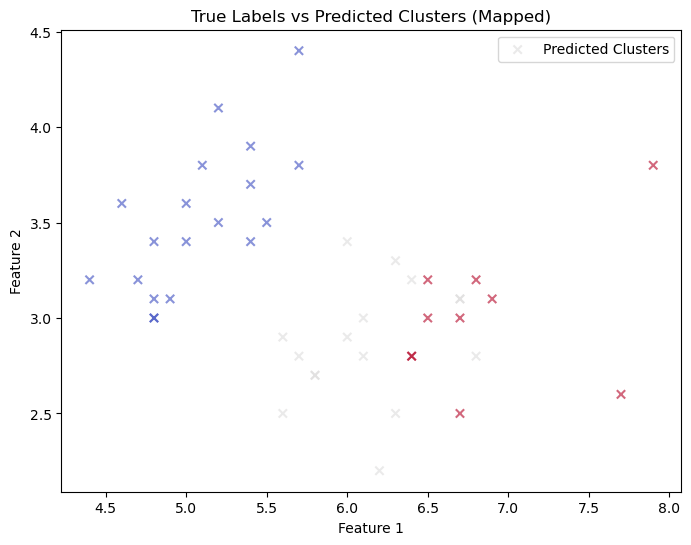

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster_labels, cmap='coolwarm', marker='x', label='Predicted Clusters', alpha=0.6)
plt.title('True Labels vs Predicted Clusters (Mapped)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
